In [1]:
import time
from glob import glob
from kid_readout.utils import parse_srs
from IPython import display

In [2]:
def plot_latest_temperatures(samples=1000):
    latest = sorted(glob('/data/readout/SRS/*.txt'))[-1]
    datetimes, srs_data = parse_srs.get_load_log(latest)
    timedeltas = [dt - datetimes[0] for dt in datetimes]
    time_hours = [td.total_seconds() / 3600 for td in timedeltas]
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(3,4))
    axes[0].plot(time_hours[-samples:], srs_data[:, -6][-samples:], label='3628')
    axes[1].plot(time_hours[-samples:], srs_data[:, -4][-samples:], label='3882')
    axes[2].plot(time_hours[-samples:], srs_data[:, 1][-samples:], label='diode 1')
    axes[2].set_xlabel('time / [hours]')
    axes[2].set_ylabel('T / [K]')
    axes[0].legend(loc='best')
    axes[1].legend(loc='best')
    axes[2].legend(loc='best')
    return fig, axes

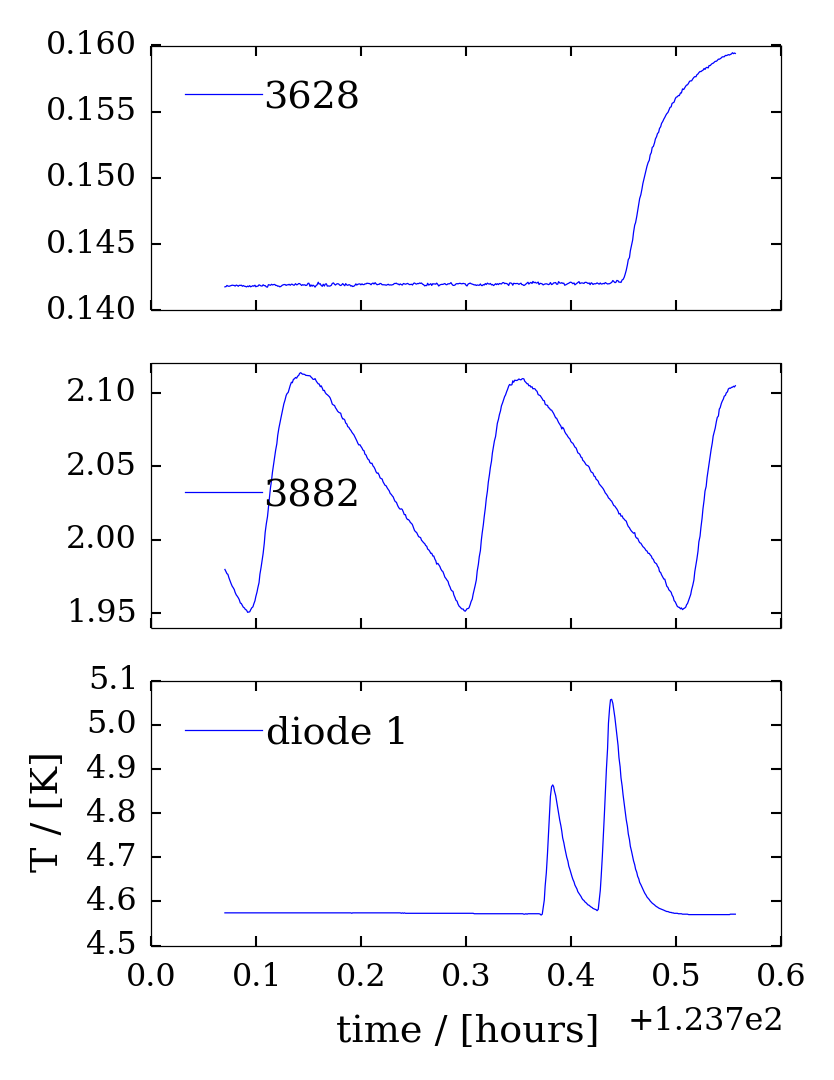

In [ ]:
refresh_time = 20
samples = 500
while True:
    fig, axes = plot_latest_temperatures(samples)
    display.clear_output()
    display.display(fig)
    time.sleep(refresh_time)
    del fig, axes